# 时间序列分析

**参考**：   
1. Wes McKinney, Python for Data Analysis, 2017
2. https://www.cnblogs.com/foley/p/5582358.html   
3. 王燕，应用时间序列分析

### Pandas处理时间序列

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 日期和时间数据类型转换

**DateTime格式定义**：  
%Y Four-digit year  
%y Two-digit year  
%m Two-digit month [01, 12]  
%d Two-digit day [01, 31]   
%H Hour (24-hour clock) [00, 23]   
%I Hour (12-hour clock) [01, 12]     
%M Two-digit minute [00, 59]   
%S Second [00, 61] (seconds 60, 61 account for leap seconds)   
%w Weekday as integer [0 (Sunday), 6]   
%U Week number of the year [00, 53]; Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”    
%W Week number of the year [00, 53]; Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”    
%z UTC time zone offset as +HHMM or -HHMM; empty if time zone naive    
%F Shortcut for %Y-%m-%d (e.g., 2012-4-18)    
%D Shortcut for %m/%d/%y (e.g., 04/18/12)   

**特定日期格式**   
%a Abbreviated weekday name   
%A Full weekday name   
%b Abbreviated month name    
%B Full month name    
%c Full date and time (e.g., ‘Tue 01 May 2012 04:20:57 PM’)    
%p Locale equivalent of AM or PM   
%x Locale-appropriate formatted date (e.g., in the United States, May 1, 2012 yields ’05/01/2012’) 
%X Locale-appropriate time (e.g., ’04:24:12 PM’)    

In [2]:
# 日期和字符串间的转化
stamp = datetime(2018, 1, 1, 12, 1, 10)
print(type(stamp), stamp)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'), '\n')

datestr = '2019-01-03'
date = datetime.strptime(datestr, '%Y-%m-%d')
print(type(date), date, '\n')

timestr = '12:10:10'
time = datetime.strptime(timestr, '%H:%M:%S')
print(type(time), time, '\n')

datestrs = ['7/16/2018', '12/30/2018']
pd.to_datetime(datestrs)

<class 'datetime.datetime'> 2018-01-01 12:01:10
2018-01-01 12:01:10
2018-01-01 

<class 'datetime.datetime'> 2019-01-03 00:00:00 

<class 'datetime.datetime'> 1900-01-01 12:10:10 



DatetimeIndex(['2018-07-16', '2018-12-30'], dtype='datetime64[ns]', freq=None)

#### 时间序列基础

In [3]:
dates = [datetime(2019, 1, 2), datetime(2018, 1, 5), datetime(2017, 1, 7), 
         datetime(2019, 1, 8), datetime(2018, 1, 10), datetime(2017, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
print(ts)
print(ts.index)
# 选择
print(ts['20180105'], ts['2017-01-7'])
print(ts[ts.index[2]])
# 切片
print(ts[::2])

2019-01-02    1.321652
2018-01-05    0.040640
2017-01-07    1.171260
2019-01-08   -2.601232
2018-01-10    0.809084
2017-01-12   -1.652322
dtype: float64
DatetimeIndex(['2019-01-02', '2018-01-05', '2017-01-07', '2019-01-08',
               '2018-01-10', '2017-01-12'],
              dtype='datetime64[ns]', freq=None)
2018-01-05    0.04064
dtype: float64 2017-01-07    1.17126
dtype: float64
1.17126025335069
2019-01-02    1.321652
2017-01-07    1.171260
2018-01-10    0.809084
dtype: float64


#### 日期范围、频率和移动

In [4]:
index1 = pd.date_range('2018-04-01', '2019-01-01')
index2 = pd.date_range(start='2018-04-01', periods=20)
index3 = pd.date_range(start='2019-01-01', periods=20)
index4 = pd.date_range('2012-05-02 12:56:31', periods=5)
print(index1, '\n', index2, '\n', index3, '\n', index4)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=276, freq='D') 
 DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20'],
              dtype='datetime64[ns]', freq='D') 
 DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',


**基本时间序列频率**   
D Day Calendar daily   
B BusinessDay Business daily   
H Hour Hourly   
T or min Minute Minutely   
S Second Secondly   
L or ms Milli Millisecond (1/1,000 of 1 second)   
U Micro Microsecond (1/1,000,000 of 1 second)   
M MonthEnd Last calendar day of month   
BM BusinessMonthEnd Last business day (weekday) of month   
MS MonthBegin First calendar day of month   
BMS BusinessMonthBegin First weekday of month   
W-MON, W-TUE, ... Week Weekly on given day of week (MON, TUE, WED, THU, FRI, SAT, or SUN)   
WOM-1MON, WOM-2MON, ... WeekOfMonth Generate weekly dates in the first, second, third, or fourth week of the month (e.g., WOM-3FRI for the third Friday of each month)   
Q-JAN, Q-FEB, ... QuarterEnd Quarterly dates anchored on last calendar day of each month, for year ending in indicated month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)   
BQ-JAN, BQ-FEB, ... BusinessQuarterEnd Quarterly dates anchored on last weekday day of each month, for year ending in indicated month   
QS-JAN, QS-FEB, ... QuarterBegin Quarterly dates anchored on first calendar day of each month, for year ending in indicated month   
BQS-JAN, BQS-FEB, ... BusinessQuarterBegin Quarterly dates anchored on first weekday day of each month, for year ending in indicated month   
A-JAN, A-FEB, ... YearEnd Annual dates anchored on last calendar day of given month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)   
BA-JAN, BA-FEB, ... BusinessYearEnd Annual dates anchored on last weekday of given month   
AS-JAN, AS-FEB, ... YearBegin Annual dates anchored on first day of given month   
BAS-JAN, BAS-FEB, ... BusinessYearBegin Annual dates anchored on first weekday of given month   

In [5]:
print(pd.date_range('2019-01-01', periods=10, freq='1h30min'))
# WOM-3FRI: 每个月的第三个星期五
print(pd.date_range('2019-01-01', '2019-09-01', freq='WOM-3FRI'))

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:30:00',
               '2019-01-01 03:00:00', '2019-01-01 04:30:00',
               '2019-01-01 06:00:00', '2019-01-01 07:30:00',
               '2019-01-01 09:00:00', '2019-01-01 10:30:00',
               '2019-01-01 12:00:00', '2019-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')
DatetimeIndex(['2019-01-18', '2019-02-15', '2019-03-15', '2019-04-19',
               '2019-05-17', '2019-06-21', '2019-07-19', '2019-08-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


In [6]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2019', periods=4, freq='M'))
print(ts)
# 只对数据进行位移
print(ts.shift(2))
# 对数据和时间同时位移
print(ts.shift(2, freq='M'))
print(ts.shift(3, freq='D'))

2019-01-31    0.683586
2019-02-28    0.364383
2019-03-31    0.158419
2019-04-30    0.946431
Freq: M, dtype: float64
2019-01-31         NaN
2019-02-28         NaN
2019-03-31    0.683586
2019-04-30    0.364383
Freq: M, dtype: float64
2019-03-31    0.683586
2019-04-30    0.364383
2019-05-31    0.158419
2019-06-30    0.946431
Freq: M, dtype: float64
2019-02-03    0.683586
2019-03-03    0.364383
2019-04-03    0.158419
2019-05-03    0.946431
dtype: float64


#### 重采样和频率转换

In [7]:
rng = pd.date_range('2018-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)

print(ts.resample('M').mean())

2018-01-01   -0.134305
2018-01-02    0.762950
2018-01-03   -1.204086
2018-01-04   -0.077782
2018-01-05    0.689047
2018-01-06   -0.562200
2018-01-07   -0.337599
2018-01-08    1.275765
2018-01-09    0.564055
2018-01-10   -0.628205
2018-01-11    0.396035
2018-01-12   -0.888831
2018-01-13    1.260760
2018-01-14    1.574111
2018-01-15    1.450724
2018-01-16   -1.400926
2018-01-17    0.140269
2018-01-18   -0.850454
2018-01-19    0.476645
2018-01-20    0.589531
2018-01-21   -2.228914
2018-01-22    0.498340
2018-01-23   -0.222507
2018-01-24    0.502556
2018-01-25   -0.352602
2018-01-26    1.933529
2018-01-27   -1.164005
2018-01-28   -1.809125
2018-01-29    0.348050
2018-01-30   -0.686511
                ...   
2018-03-12   -0.531364
2018-03-13    0.345146
2018-03-14   -2.895594
2018-03-15   -0.547575
2018-03-16   -1.498614
2018-03-17    1.206579
2018-03-18    1.578069
2018-03-19   -0.753612
2018-03-20   -1.444166
2018-03-21    0.261280
2018-03-22   -0.079344
2018-03-23   -0.389088
2018-03-24 

freq: String or DateOffset indicating desired resampled frequency (e.g., ‘M', ’5min', or Second(15))    
axis: Axis to resample on; default axis=0    
fill_method: How to interpolate when upsampling, as in 'ffill' or 'bfill'; by default does no interpolation   
closed: In downsampling, which end of each interval is closed (inclusive), 'right' or 'left' label In downsampling, how to label the aggregated result, with the 'right' or 'left' bin edge (e.g., the 9:30 to 9:35 five-minute interval could be labeled 9:30 or 9:35)       
loffset: Time adjustment to the bin labels, such as '-1s' / Second(-1) to shift the aggregate labels one second earlier    
limit: When forward or backward filling, the maximum number of periods to fill    
kind: Aggregate to periods ('period') or timestamps ('timestamp'); defaults to the type of index the time series has   
convention: When resampling periods, the convention ('start' or 'end') for converting the low-frequency period to high frequency; defaults to 'end'   

In [8]:
rng = pd.date_range('2018-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
print(ts)

2018-01-01 00:00:00     0
2018-01-01 00:01:00     1
2018-01-01 00:02:00     2
2018-01-01 00:03:00     3
2018-01-01 00:04:00     4
2018-01-01 00:05:00     5
2018-01-01 00:06:00     6
2018-01-01 00:07:00     7
2018-01-01 00:08:00     8
2018-01-01 00:09:00     9
2018-01-01 00:10:00    10
2018-01-01 00:11:00    11
Freq: T, dtype: int32


In [9]:
# 降采样
print(ts.resample('5min', closed='right').sum())
print(ts.resample('5min', closed='left').sum())
print(ts.resample('5min', closed='right', label='right').sum())
print(ts.resample('5min', closed='right', label='right', loffset='-1s').sum())

2017-12-31 23:55:00     0
2018-01-01 00:00:00    15
2018-01-01 00:05:00    40
2018-01-01 00:10:00    11
Freq: 5T, dtype: int32
2018-01-01 00:00:00    10
2018-01-01 00:05:00    35
2018-01-01 00:10:00    21
Freq: 5T, dtype: int32
2018-01-01 00:00:00     0
2018-01-01 00:05:00    15
2018-01-01 00:10:00    40
2018-01-01 00:15:00    11
Freq: 5T, dtype: int32
2017-12-31 23:59:59     0
2018-01-01 00:04:59    15
2018-01-01 00:09:59    40
2018-01-01 00:14:59    11
Freq: 5T, dtype: int32


In [10]:
# 升采样
frame = pd.DataFrame(np.random.randn(2, 4), index=pd.date_range('1/1/2019', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
print(frame)
df_daily = frame.resample('D').asfreq()
print(df_daily)

print(frame.resample('D').bfill())
print(frame.resample('W-THU').ffill())

            Colorado     Texas  New York      Ohio
2019-01-02 -1.722049  0.239592 -0.817271  1.561691
2019-01-09  0.047291  0.160520  1.135253  0.769931
            Colorado     Texas  New York      Ohio
2019-01-02 -1.722049  0.239592 -0.817271  1.561691
2019-01-03       NaN       NaN       NaN       NaN
2019-01-04       NaN       NaN       NaN       NaN
2019-01-05       NaN       NaN       NaN       NaN
2019-01-06       NaN       NaN       NaN       NaN
2019-01-07       NaN       NaN       NaN       NaN
2019-01-08       NaN       NaN       NaN       NaN
2019-01-09  0.047291  0.160520  1.135253  0.769931
            Colorado     Texas  New York      Ohio
2019-01-02 -1.722049  0.239592 -0.817271  1.561691
2019-01-03  0.047291  0.160520  1.135253  0.769931
2019-01-04  0.047291  0.160520  1.135253  0.769931
2019-01-05  0.047291  0.160520  1.135253  0.769931
2019-01-06  0.047291  0.160520  1.135253  0.769931
2019-01-07  0.047291  0.160520  1.135253  0.769931
2019-01-08  0.047291  0.160520 

#### 滑动窗口函数

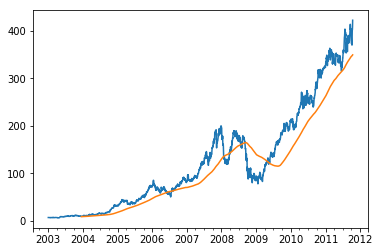

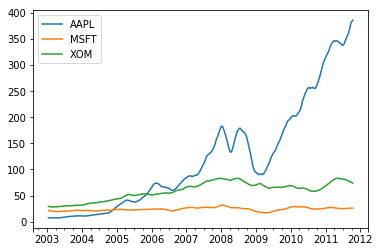

In [11]:
close_px_all = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()
# 如果当前数据小于滑动窗口大小，可以设置指定数量的非NA的观测值，默认这个值为1
close_px.AAPL.rolling(250).mean().plot();
close_px.rolling(60, min_periods=10).mean().plot();

### 时间序列预处理

#### 平稳性检验

In [12]:
rrc_att = [ 
    1752., 1975., 1791., 1743., 1687., 1711., 1847., 1727., 1730.,
    1736., 1845., 1731., 1715., 1801., 1819., 1729., 1696., 1762.,
    1806., 1755., 1657., 1754., 1785., 1724., 1652., 1885., 1787.,
    1703., 1683., 1707., 1838., 1765., 1685., 1764., 1890., 1817.,
    1724., 1887., 1858., 1793., 1694., 1784., 1846., 1753., 1680.,
    1729., 1828., 1742., 1693., 1802., 1862., 1685., 1691., 1660.,
    1828., 1710., 1663., 1685., 1883., 1717., 1674., 1790., 1873.,
    1780., 1708., 1741., 1831., 1653., 1662., 1645., 1821., 1647.,
    1623., 1710., 1884., 1744., 1755., 1706., 1861., 1723., 1728.,
    1725., 1798., 1583., 1519., 1647., 1745., 1565., 1561., 1503.,
    1908., 1715., 1745., 1702., 1877., 1732.]
index = pd.date_range(start='2018-12-31 09:00:00', end='2019-01-01 08:45:00', freq='15min')
rrc_att_ser = pd.Series(rrc_att, index=index)

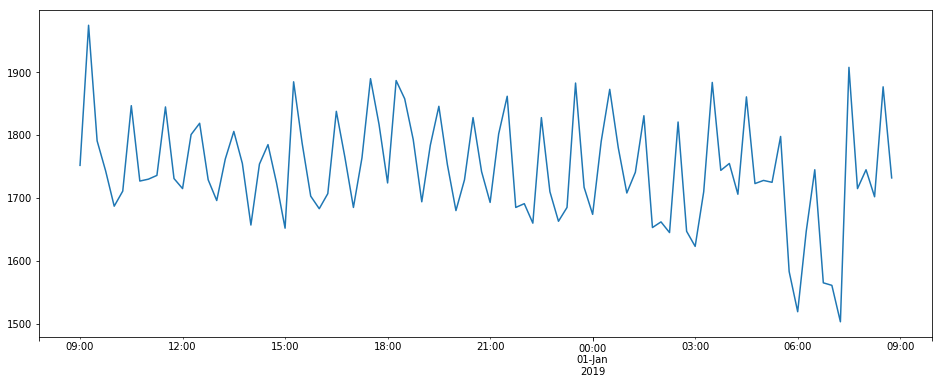

In [13]:
rrc_att_ser.plot(figsize=(16,6))

平稳性，正态性，独立性，周期性，趋势项

### 平稳时间序列分析

### 非平稳时间序列分析

### 多元时间序列分析